<a href="https://colab.research.google.com/github/mochi1214/openCV_test/blob/main/opencv_playmp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import subprocess
import os
import time
import base64
import IPython.display as dp

# 取得影像來源：
cap = cv2.VideoCapture('h3.mp4')

# 獲取影片寬度和高度
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 影片寫入物件
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (width, height))

if not out.isOpened():
    raise Exception("Could not open output video file")

while True:
    ret, frame = cap.read()
    if ret:

        # 將圖像轉換到HSV色彩空间
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # 創建藍色的mask（遮罩）
        mask = cv2.inRange(hsv, (110,50,50), (130,255,255))

        # 先膨脹後侵蝕讓圖片乾淨
        mask = cv2.erode(mask, np.ones((2, 2)))
        mask = cv2.dilate(mask, np.ones((42, 42)))
        mask = cv2.erode(mask, np.ones((38, 38)))

        # 尋找輪廓
        contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

        # 繪製輪廓
        cv2.drawContours(frame, contours, -1, (0,0,255), 3)

        # 寫入畫面
        out.write(frame)

    else:
        break

# 釋放資源並關閉窗口
cap.release()
out.release()

while not os.path.exists("output.mp4"):
    print("Waiting for output.mp4 to be created...")
    time.sleep(1)

print("output.mp4 exists, proceeding with ffmpeg...")
subprocess.call(['ffmpeg', '-i', 'output.mp4', '-vcodec', 'libx264', 'output_h264.mp4'])

# 讀取轉檔後的影片
with open("output_h264.mp4", "rb") as f:
  d = base64.b64encode(f.read()).decode()

# 顯示影片
dp.HTML(
    f'<video src = "data:video/mp4;base64, {d}" controls>'
)


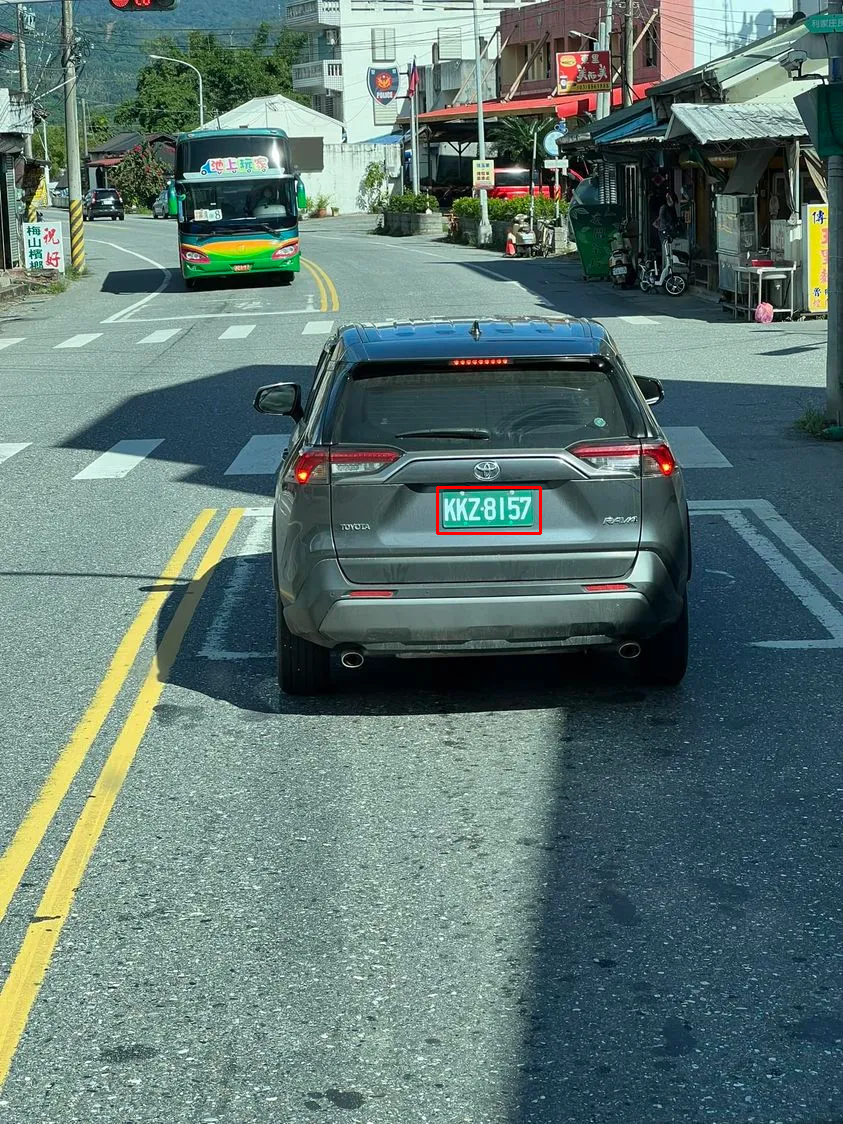

In [19]:
import cv2
import numpy as np

# 将深绿色从RGB色彩空间转换为HSV色彩空间
deep_green_rgb = np.uint8([[[82, 170, 142]]]) # RGB color （車牌的顏色）
deep_green_hsv = cv2.cvtColor(deep_green_rgb, cv2.COLOR_RGB2HSV) # Converting to HSV
h = deep_green_hsv[0][0][0]

# 读取图片
m1 = cv2.imread("Image.png")

# 转换到HSV颜色空间
hsv = cv2.cvtColor(m1, cv2.COLOR_BGR2HSV)

# 使用你得到的深绿色在HSV色彩空间中的范围
lower_green = np.array([h-10, 100, 100])
upper_green = np.array([h+10, 255, 255])

# 创建深绿色的mask
mask = cv2.inRange(hsv, (h-10, 100, 100), (h+10, 255, 255))

# 利用膨胀的效果把字变大，如果字连在一起会被判断成一个轮廓（单词）
mask = cv2.dilate(mask, np.ones((8, 8)))

# 寻找轮廓
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 找到最大的轮廓
max_contour = max(contours, key = cv2.contourArea)

# 获取最大轮廓的边界框
x, y, w, h = cv2.boundingRect(max_contour)

# 绘制边界框
cv2.rectangle(m1, (x, y), (x+w, y+h), (0, 0, 255), 2)

cv2_imshow(m1)
